In [1]:
%matplotlib inline

In [2]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ks_2samp
from IPython.core.display import display_html, display, HTML

In [3]:
images = {}
for image_path in glob('RTG/B/*'):
    name = image_path.split('/')[-1]
    images[name] = Image.open(image_path)

In [4]:
images

{'0_10_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=449x617 at 0x7F0A9FD3A940>,
 '0_8_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=474x628 at 0x7F0A9FD3AB00>,
 '10_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=393x622 at 0x7F0A9FD3A780>,
 '11_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=476x628 at 0x7F0A9FD3A860>,
 '12_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=448x623 at 0x7F0A9FD32DA0>,
 '13_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=440x624 at 0x7F0A9FD3A160>,
 '14_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=352x622 at 0x7F0A9FD3A390>,
 '15_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=451x624 at 0x7F0A9FD3A7F0>,
 '16_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=369x622 at 0x7F0A9FD3A630>,
 '17_0_b.PNG': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=434x616 at 0x7F0A9FD3AC50>,
 '18_0_b.PNG': <PIL.PngImagePlu

## Ořez obrázků

### Ukázka jednoho ořezu (pro představu)

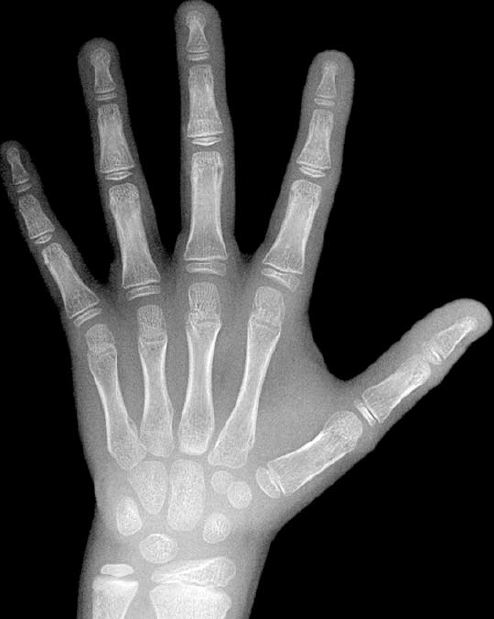

In [7]:
img = images['8_0_b.PNG']
img

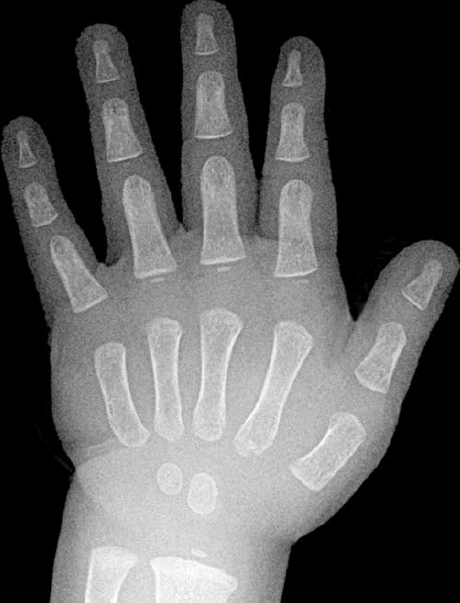

In [35]:
img2 = images['1_4_b.PNG']
img2

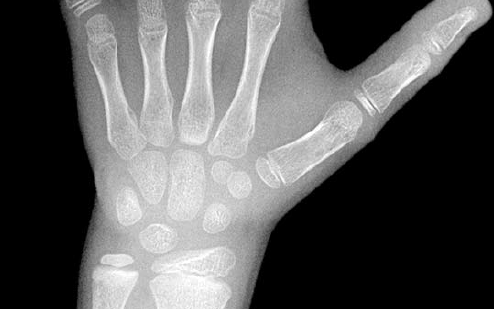

In [5]:
w, h = img.size
new_img = img.crop((0, h - (h // 2), w, h))
new_img

### Ořez všech obrázků v podobném duchu

In [42]:
cropped_images = {}
for name, img in images.items():
    w, h = img.size
    cropped_img = img.crop((0, h - (h // 2), w, h))
    cropped_images[name] = cropped_img
images = cropped_images
cropped_images

{'0_10_b.PNG': <PIL.Image.Image image mode=RGBA size=449x308 at 0x7F391ACAFCC0>,
 '0_8_b.PNG': <PIL.Image.Image image mode=RGBA size=474x314 at 0x7F391A44FE80>,
 '10_0_b.PNG': <PIL.Image.Image image mode=RGBA size=393x311 at 0x7F391A30D7F0>,
 '11_0_b.PNG': <PIL.Image.Image image mode=RGBA size=476x314 at 0x7F391A2CDFD0>,
 '12_0_b.PNG': <PIL.Image.Image image mode=RGBA size=448x311 at 0x7F391A32DFD0>,
 '13_0_b.PNG': <PIL.Image.Image image mode=RGBA size=440x312 at 0x7F391A35F5F8>,
 '14_0_b.PNG': <PIL.Image.Image image mode=RGBA size=352x311 at 0x7F391A33AD30>,
 '15_0_b.PNG': <PIL.Image.Image image mode=RGBA size=451x312 at 0x7F391A3138D0>,
 '16_0_b.PNG': <PIL.Image.Image image mode=RGBA size=369x311 at 0x7F391A3067B8>,
 '17_0_b.PNG': <PIL.Image.Image image mode=RGBA size=434x308 at 0x7F391A458208>,
 '18_0_b.PNG': <PIL.Image.Image image mode=RGBA size=394x312 at 0x7F391B3787F0>,
 '1_0_b.PNG': <PIL.Image.Image image mode=RGBA size=567x298 at 0x7F391A3538D0>,
 '1_2_b.PNG': <PIL.Image.Image

## Dále už je to stejné

In [26]:
histograms = {}
for name, image in images.items():
    histograms[name] = np.histogram(image.getdata(), bins=255, normed=True)[0][2:-1]

In [27]:
histograms['8_0_b.PNG'][0:5]

array([ 0.00287701,  0.00200385,  0.00137106,  0.00082656,  0.00056167])

In [28]:
histograms['8_0_b.PNG'][-5:]

array([ 0.00024036,  0.00019131,  0.00015452,  0.00017169,  0.00012263])

<Container object of 252 artists>

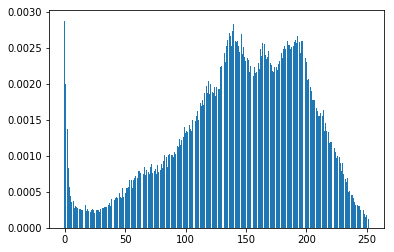

In [29]:
plt.bar(range(len(histograms['8_0_b.PNG'])), height=histograms['8_0_b.PNG'])

<Container object of 252 artists>

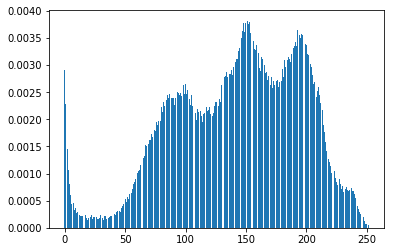

In [37]:
plt.bar(range(len(histograms['1_4_b.PNG'])), height=histograms['1_4_b.PNG'])

In [30]:
def ks_str(ks_result):
    statistic = ks_result.statistic
    pvalue = ks_result.pvalue
    return "s={:.4f} p={:.4f}".format(statistic, pvalue)

In [31]:
ks_data = {}
for image1 in images.keys():
    ks_data[image1] = {}
    for image2 in images.keys():
        ks = ks_2samp(histograms[image1], histograms[image2])
        ks_data[image1][image2] = ks

In [32]:
image_names = sorted(list(images.keys()), key=lambda x: [int(n) for n in x.split('_')[:2]])

In [33]:
html_table = "<table><tr><td></td>{}</tr>".format("".join(["<td>{}</td>".format(name) for name in image_names]))
for image1 in image_names:
    html_table += "<tr><td>{}</td>".format(image1)
    for image2 in image_names:
        ks = ks_data[image1][image2]
        if ks.pvalue < 0.05:
            html_table += "<td>{}</td>".format(ks_str(ks_data[image1][image2]))
        else:
            html_table += "<td style='font-weight:bold;'>{}</td>".format(ks_str(ks))
    html_table += "</tr>"
html_table += "</table>"

In [34]:
display(HTML(html_table))

,0_8_b.PNG,0_10_b.PNG,1_0_b.PNG,1_2_b.PNG,1_4_b.PNG,1_6_b.PNG,1_8_b.PNG,2_0_b.PNG,2_4_b.PNG,2_6_b.PNG,3_0_b.PNG,3_6_b.PNG,4_0_b.PNG,4_6_b.PNG,5_0_b.PNG,5_6_b.PNG,6_0_b.PNG,7_0_b.PNG,8_0_b.PNG,9_0_b.PNG,10_0_b.PNG,11_0_b.PNG,12_0_b.PNG,13_0_b.PNG,14_0_b.PNG,15_0_b.PNG,16_0_b.PNG,17_0_b.PNG,18_0_b.PNG
0_8_b.PNG,s=0.0000 p=1.0000,s=0.1587 p=0.0030,s=0.1865 p=0.0003,s=0.1349 p=0.0183,s=0.0794 p=0.3911,s=0.0913 p=0.2331,s=0.0833 p=0.3321,s=0.1944 p=0.0001,s=0.2698 p=0.0000,s=0.1587 p=0.0030,s=0.2143 p=0.0000,s=0.1944 p=0.0001,s=0.0952 p=0.1927,s=0.2579 p=0.0000,s=0.1310 p=0.0240,s=0.1944 p=0.0001,s=0.1667 p=0.0015,s=0.2103 p=0.0000,s=0.2262 p=0.0000,s=0.1667 p=0.0015,s=0.2381 p=0.0000,s=0.2500 p=0.0000,s=0.2421 p=0.0000,s=0.1984 p=0.0001,s=0.2103 p=0.0000,s=0.2341 p=0.0000,s=0.1667 p=0.0015,s=0.2897 p=0.0000,s=0.2183 p=0.0000
0_10_b.PNG,s=0.1587 p=0.0030,s=0.0000 p=1.0000,s=0.2778 p=0.0000,s=0.2103 p=0.0000,s=0.1111 p=0.0829,s=0.1468 p=0.0077,s=0.1548 p=0.0042,s=0.2500 p=0.0000,s=0.3492 p=0.0000,s=0.2222 p=0.0000,s=0.1944 p=0.0001,s=0.2540 p=0.0000,s=0.1627 p=0.0022,s=0.4008 p=0.0000,s=0.2143 p=0.0000,s=0.2937 p=0.0000,s=0.1944 p=0.0001,s=0.2778 p=0.0000,s=0.3214 p=0.0000,s=0.1667 p=0.0015,s=0.1627 p=0.0022,s=0.3889 p=0.0000,s=0.2897 p=0.0000,s=0.2222 p=0.0000,s=0.1151 p=0.0658,s=0.3532 p=0.0000,s=0.1429 p=0.0104,s=0.3532 p=0.0000,s=0.2976 p=0.0000
1_0_b.PNG,s=0.1865 p=0.0003,s=0.2778 p=0.0000,s=0.0000 p=1.0000,s=0.1508 p=0.0057,s=0.2183 p=0.0000,s=0.2341 p=0.0000,s=0.2143 p=0.0000,s=0.1627 p=0.0022,s=0.1825 p=0.0004,s=0.1865 p=0.0003,s=0.2381 p=0.0000,s=0.0992 p=0.1580,s=0.1468 p=0.0077,s=0.1587 p=0.0030,s=0.1786 p=0.0005,s=0.1310 p=0.0240,s=0.2103 p=0.0000,s=0.2183 p=0.0000,s=0.1508 p=0.0057,s=0.1905 p=0.0002,s=0.2579 p=0.0000,s=0.1667 p=0.0015,s=0.1706 p=0.0011,s=0.2262 p=0.0000,s=0.2381 p=0.0000,s=0.1349 p=0.0183,s=0.1865 p=0.0003,s=0.2103 p=0.0000,s=0.2143 p=0.0000
1_2_b.PNG,s=0.1349 p=0.0183,s=0.2103 p=0.0000,s=0.1508 p=0.0057,s=0.0000 p=1.0000,s=0.1667 p=0.0015,s=0.1429 p=0.0104,s=0.1627 p=0.0022,s=0.2024 p=0.0001,s=0.2381 p=0.0000,s=0.1468 p=0.0077,s=0.1905 p=0.0002,s=0.1627 p=0.0022,s=0.1349 p=0.0183,s=0.2579 p=0.0000,s=0.0952 p=0.1927,s=0.2024 p=0.0001,s=0.1825 p=0.0004,s=0.2183 p=0.0000,s=0.2381 p=0.0000,s=0.1825 p=0.0004,s=0.2222 p=0.0000,s=0.2579 p=0.0000,s=0.2024 p=0.0001,s=0.1905 p=0.0002,s=0.1905 p=0.0002,s=0.2103 p=0.0000,s=0.1508 p=0.0057,s=0.2341 p=0.0000,s=0.1786 p=0.0005
1_4_b.PNG,s=0.0794 p=0.3911,s=0.1111 p=0.0829,s=0.2183 p=0.0000,s=0.1667 p=0.0015,s=0.0000 p=1.0000,s=0.0873 p=0.2795,s=0.0833 p=0.3321,s=0.2341 p=0.0000,s=0.3095 p=0.0000,s=0.1944 p=0.0001,s=0.1944 p=0.0001,s=0.2421 p=0.0000,s=0.1310 p=0.0240,s=0.3175 p=0.0000,s=0.1587 p=0.0030,s=0.2381 p=0.0000,s=0.1865 p=0.0003,s=0.2421 p=0.0000,s=0.2857 p=0.0000,s=0.1746 p=0.0008,s=0.1786 p=0.0005,s=0.3135 p=0.0000,s=0.2897 p=0.0000,s=0.2024 p=0.0001,s=0.1508 p=0.0057,s=0.2778 p=0.0000,s=0.1349 p=0.0183,s=0.3333 p=0.0000,s=0.2619 p=0.0000
1_6_b.PNG,s=0.0913 p=0.2331,s=0.1468 p=0.0077,s=0.2341 p=0.0000,s=0.1429 p=0.0104,s=0.0873 p=0.2795,s=0.0000 p=1.0000,s=0.1429 p=0.0104,s=0.2738 p=0.0000,s=0.2976 p=0.0000,s=0.2103 p=0.0000,s=0.2183 p=0.0000,s=0.2024 p=0.0001,s=0.1508 p=0.0057,s=0.3333 p=0.0000,s=0.1349 p=0.0183,s=0.2738 p=0.0000,s=0.1905 p=0.0002,s=0.2897 p=0.0000,s=0.3095 p=0.0000,s=0.1865 p=0.0003,s=0.2460 p=0.0000,s=0.3254 p=0.0000,s=0.2500 p=0.0000,s=0.2460 p=0.0000,s=0.2183 p=0.0000,s=0.2778 p=0.0000,s=0.1746 p=0.0008,s=0.2976 p=0.0000,s=0.2262 p=0.0000
1_8_b.PNG,s=0.0833 p=0.3321,s=0.1548 p=0.0042,s=0.2143 p=0.0000,s=0.1627 p=0.0022,s=0.0833 p=0.3321,s=0.1429 p=0.0104,s=0.0000 p=1.0000,s=0.2183 p=0.0000,s=0.3016 p=0.0000,s=0.1825 p=0.0004,s=0.1905 p=0.0002,s=0.2262 p=0.0000,s=0.1230 p=0.0404,s=0.3333 p=0.0000,s=0.1587 p=0.0030,s=0.2262 p=0.0000,s=0.1786 p=0.0005,s=0.2183 p=0.0000,s=0.2460 p=0.0000,s=0.1587 p=0.0030,s=0.1944 p=0.0001,s=0.3175 p=0.0000,s=0.2738 p=0.0000,s=0.1984 p=0.0001,s=0.1706 p=0.0011,s=0.2857 p=0.0000,s=0.1230 p=0.0404,s=0.3254 p